# Viewing Radar Products

In [3]:
%matplotlib inline

import os
import glob
import matplotlib.pyplot as plt
plt.ioff()

import blib
blib.useTheme("dark")

# import radarkit
# import radarkit.chart

import src.radarkit as radarkit
import src.radarkit.chart

# RHI

In [ ]:
files = glob.glob('data/raxpol/20240708/*.xz')
# files = sorted(glob.glob('data/moment/20231004/*-Z.nc'))
# files = sorted(glob.glob('data/*-Z.nc'))
assert len(files) > 0, "No files found"
file = files[min(len(files) - 1, 7)]
print(f"Selected file {file} ({len(files)} files)")

In [ ]:
sweep = radarkit.sweep.Sweep(file)

# rhi = radarkit.chart.ChartRHI(size=(2560, 1440), s=2.0)
# rhi.set_data(sweep)

rhi = radarkit.chart.ChartRHI(sweep, size=(1920, 1080), s=1.5, titlecolor='deepskyblue')
rhi.set_xlim((-30, 30))
rhi.fig

# PPI

In [ ]:
files = sorted(glob.glob("data/px1000/20240708/*tar.xz"))
assert len(files) > 0, "No files found"
file = files[0]
print(f"Selected file {file}")

In [57]:
import radar
import numpy as np

In [58]:
file = os.path.expanduser("~/Downloads/data/test.nc")
data = radar.read(file)

In [71]:
a = [np.expand_dims(data['products'][key], axis=0) for key in data['products'].keys()]
plain = np.ma.concatenate(a)
plain[4, :, :] = np.deg2rad(plain[4, :, :])
sweep = radarkit.sweep.Sweep(plain, dr=30)

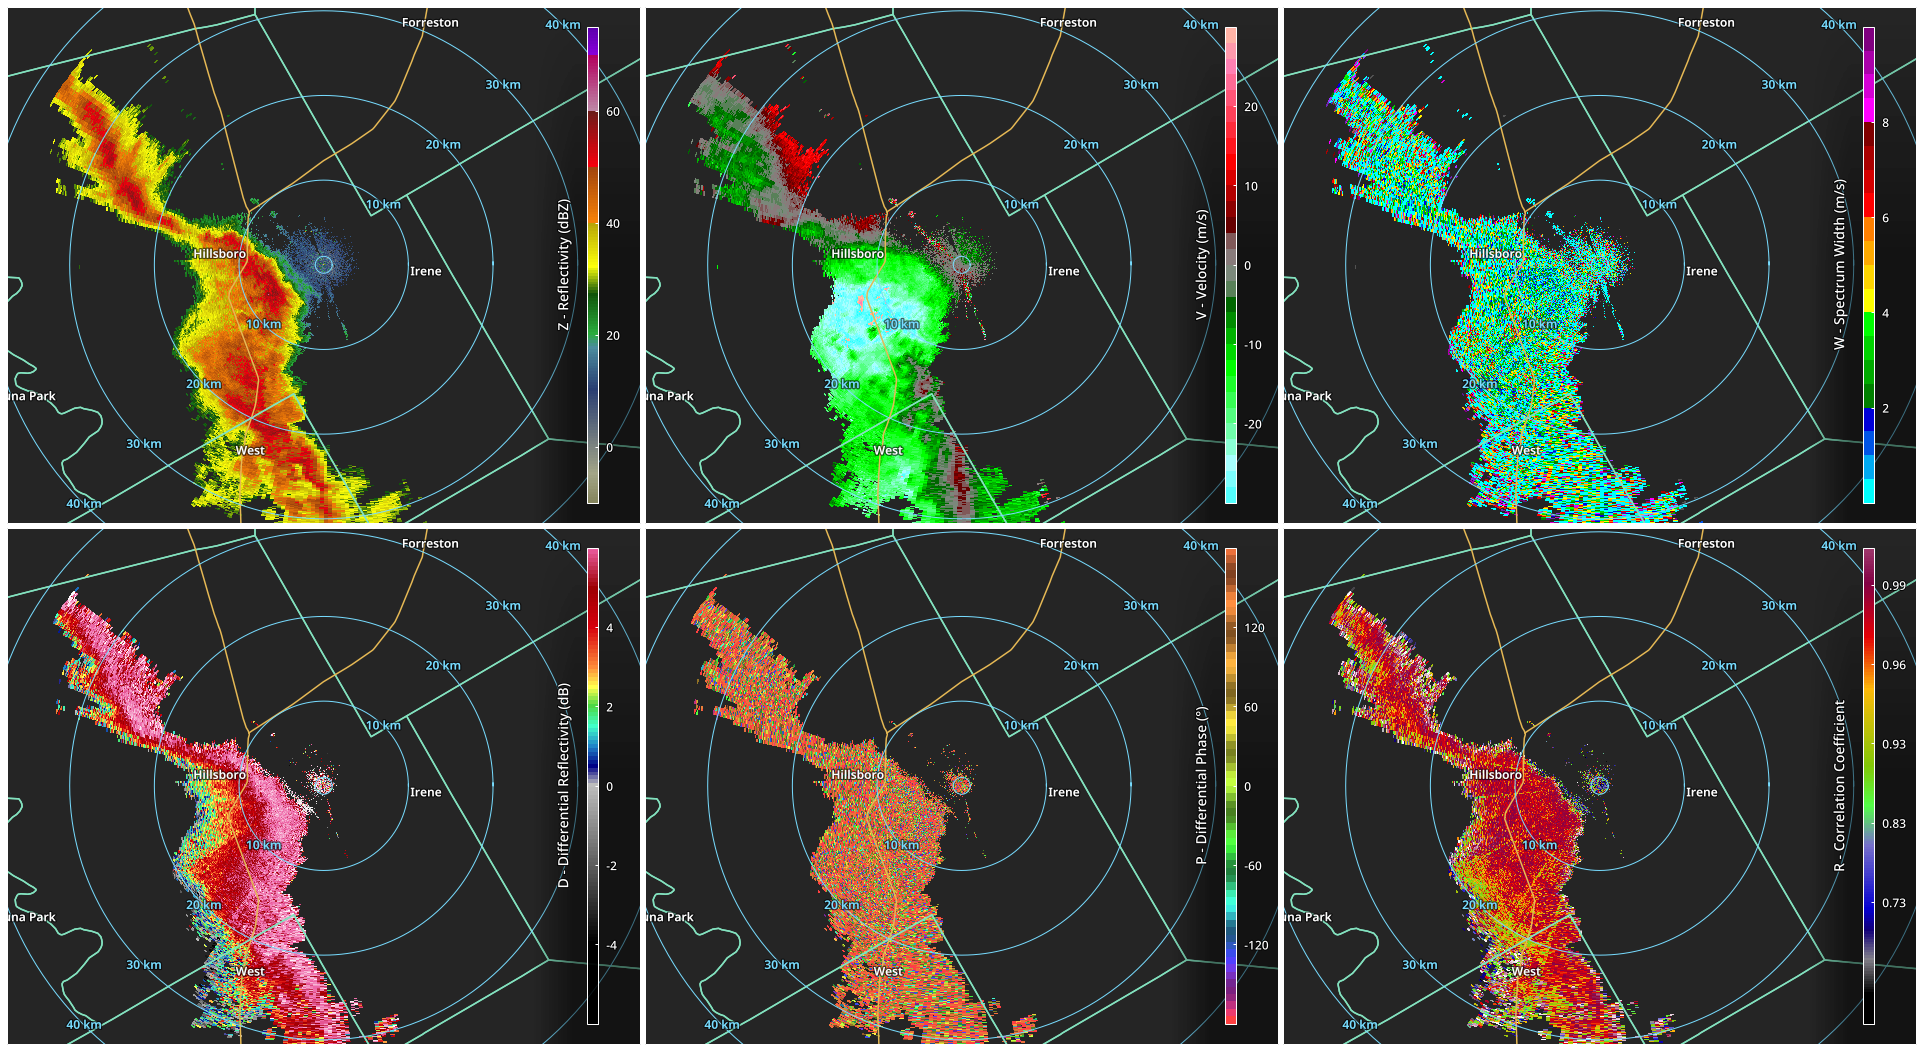

In [72]:
# sweep = radarkit.sweep.Sweep(file)
# sweep.scanType = 'PPI'

# ppi = radarkit.chart.ChartPPI()
# ppi.set_data(sweep)

ppi = radarkit.chart.ChartPPI(sweep, size=(1920, 1080), titlecolor="steelblue")
ppi.fig

In [70]:
plain[5, :4, :3]

masked_array(
  data=[[0.01740093342959881, 0.0019373155664652586, 0.01129228062927723],
        [0.01740093342959881, 0.0022863815538585186,
         0.013473941944539547],
        [0.01740093342959881, 0.0027750737499445677,
         0.007731808815151453],
        [0.017383480444550514, 0.0027925269678235054,
         0.007120943628251553]],
  mask=[[False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False]],
  fill_value=np.float64(1e+20),
  dtype=float32)

In [ ]:
plt.show()

In [ ]:
plt.close("all")